<a href="https://colab.research.google.com/github/spuderaarom/Intro-to-ML/blob/main/Assignment_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [51]:
# Generic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate



breast =load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [52]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Problem 1.1
(i) ( 7.5+2.5+2.5 points) Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training.  Also, report your results, including accuracy, precision, and recall. Plot the confusion matrix representing your binary classifier.

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


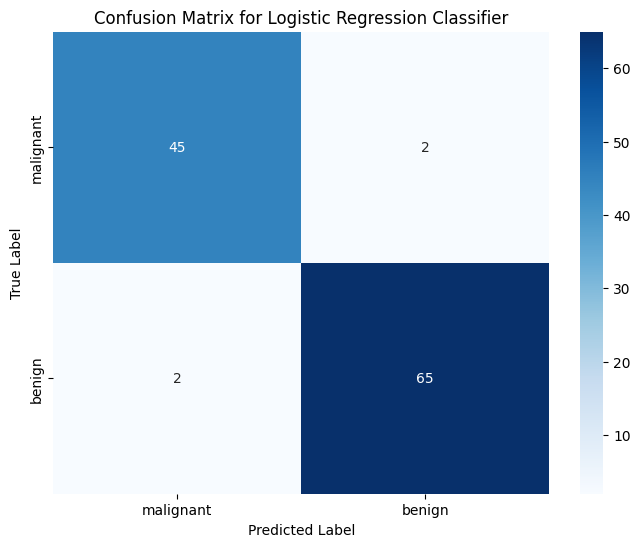

In [53]:
# Split data to training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Standardizing features to be able scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the logistic regression model
logistic_model = LogisticRegression(max_iter=10000) # Increased max_iter for convergence
logistic_model.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = logistic_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

#Ploting Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Problem 1.2
(ii) (7.5+2.5+2.5 points) How about adding a weight penalty here, considering the number of parameters? Add the weight penalty and repeat the training and report the results.


(ii) Logistic Regression with weight penalty:
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


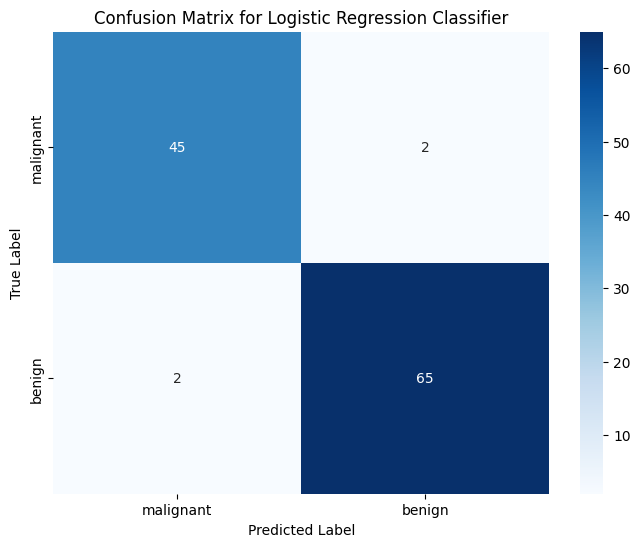

In [54]:
# Train the logistic regression model with L2 penalty
logistic_model_l2 = LogisticRegression(penalty='l2', max_iter=10000)
logistic_model_l2.fit(X_train_scaled, Y_train)

# Predictions
Y_pred_l2 = logistic_model_l2.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_l2 = accuracy_score(Y_test, Y_pred_l2)
precision_l2 = precision_score(Y_test, Y_pred_l2)
recall_l2 = recall_score(Y_test, Y_pred_l2)
f1_l2 = f1_score(Y_test, Y_pred_l2)

# results
print("\n(ii) Logistic Regression with weight penalty:")
print("Accuracy:", accuracy_l2)
print("Precision:", precision_l2)
print("Recall:", recall_l2)
print("F1 Score:", f1_l2)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

#Ploting Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Problem 2.1
(i) (13 points) Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test).

In [55]:
nb_model = GaussianNB() # initialize Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, Y_train)# Train the model
Y_pred_nb = nb_model.predict(X_test_scaled) # Predictions

#Data has already been split, so we can keep going with the training/evaluating with these sets

# Evaluation
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)

# Report results
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)


Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


#Problem 2.2
(ii) (7+5) Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results, comparing your results against the logistic regression classifier you did in Problem 2.

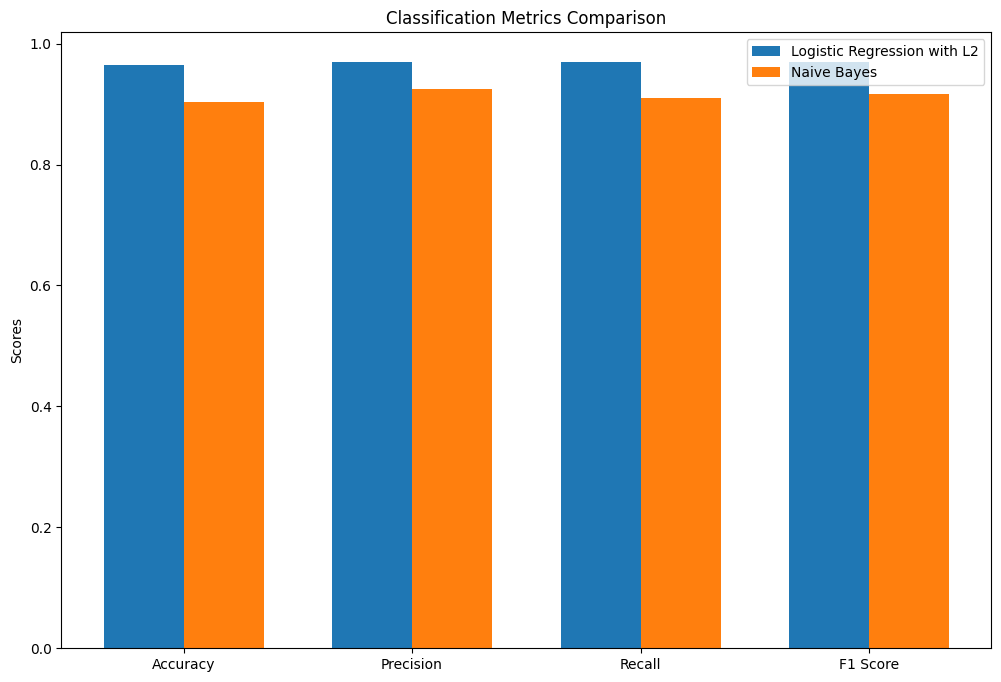

In [56]:
metrics_logreg = [accuracy_l2, precision_l2, recall_l2, f1_l2] #Logistic regression metrics, including L2
metrics_nb = [accuracy_nb, precision_nb, recall_nb, f1_nb] #Naive Bayes metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics_names)) #matrix location
plt.figure(figsize=(12, 8)) #setting up bar chart

# Plot the metrics for both classifiers
bar_width = 0.35
plt.bar(x - bar_width/2, metrics_logreg, bar_width, label='Logistic Regression with L2')
plt.bar(x + bar_width/2, metrics_nb, bar_width, label='Naive Bayes')

plt.ylabel('Scores')
plt.title('Classification Metrics Comparison')
plt.xticks(x, metrics_names)
plt.legend()

plt.legend()
plt.show()


#Problem 3
(15 points) Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy.

(5 + 5 points) Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 1 and 2.

In [57]:
cv_accuracy_scores = []
cv_precision_scores = []
cv_recall_scores = []
cv_f1_scores = []

for K in num_components:
    pca = PCA(n_components=K)
    logistic_model_pca = LogisticRegression(max_iter=10000)
    pipeline = make_pipeline(pca, logistic_model_pca)

    cv_results = cross_validate(pipeline, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

    cv_accuracy_scores.append(cv_results['test_accuracy'].mean())
    cv_precision_scores.append(cv_results['test_precision'].mean())
    cv_recall_scores.append(cv_results['test_recall'].mean())
    cv_f1_scores.append(cv_results['test_f1'].mean())

optimal_cv_K = num_components[np.argmax(cv_accuracy_scores)]
optimal_cv_accuracy = np.max(cv_accuracy_scores)

optimal_cv_K, optimal_cv_accuracy


(9, 0.9846153846153847)

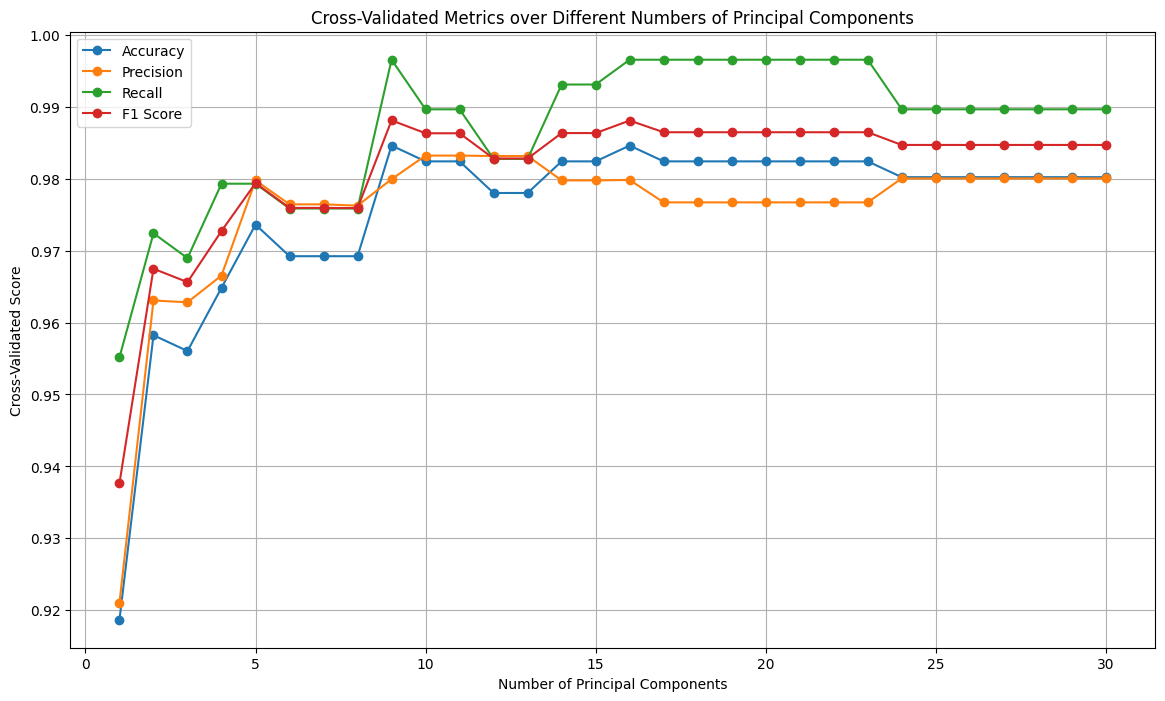

In [58]:
plt.figure(figsize=(14, 8))

plt.plot(num_components, cv_accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_components, cv_precision_scores, label='Precision', marker='o')
plt.plot(num_components, cv_recall_scores, label='Recall', marker='o')
plt.plot(num_components, cv_f1_scores, label='F1 Score', marker='o')

plt.title('Cross-Validated Metrics over Different Numbers of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validated Score')
plt.legend()
plt.grid(True)
plt.show()


#Problem 4
(15 + 5 + 5 points) Can you repeat problem 3? This time, replace the logistic regression with Bayesian classifier. Report your results (classification accuracy, precision, recall, and F1 score). Compare your results against problems 1, 2 and 3.

In [59]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Redefine the lists to store the cross-validated metrics for each K value
nb_cv_accuracy_scores = []
nb_cv_precision_scores = []
nb_cv_recall_scores = []
nb_cv_f1_scores = []

# Perform the PCA and cross-validation using Naive Bayes for each K value
for K in num_components:
    # Create a pipeline with PCA and Naive Bayes
    pca = PCA(n_components=K)
    pipeline = make_pipeline(pca, nb_model)

    # Perform cross-validation and store the mean scores
    cv_results = cross_validate(pipeline, X_train_scaled, Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

    # Append the average of the scores to their respective lists
    nb_cv_accuracy_scores.append(cv_results['test_accuracy'].mean())
    nb_cv_precision_scores.append(cv_results['test_precision'].mean())
    nb_cv_recall_scores.append(cv_results['test_recall'].mean())
    nb_cv_f1_scores.append(cv_results['test_f1'].mean())

# Find the K with the highest average accuracy
optimal_nb_K = num_components[np.argmax(nb_cv_accuracy_scores)]
optimal_nb_accuracy = np.max(nb_cv_accuracy_scores)

optimal_nb_K, optimal_nb_accuracy


(6, 0.9274725274725275)

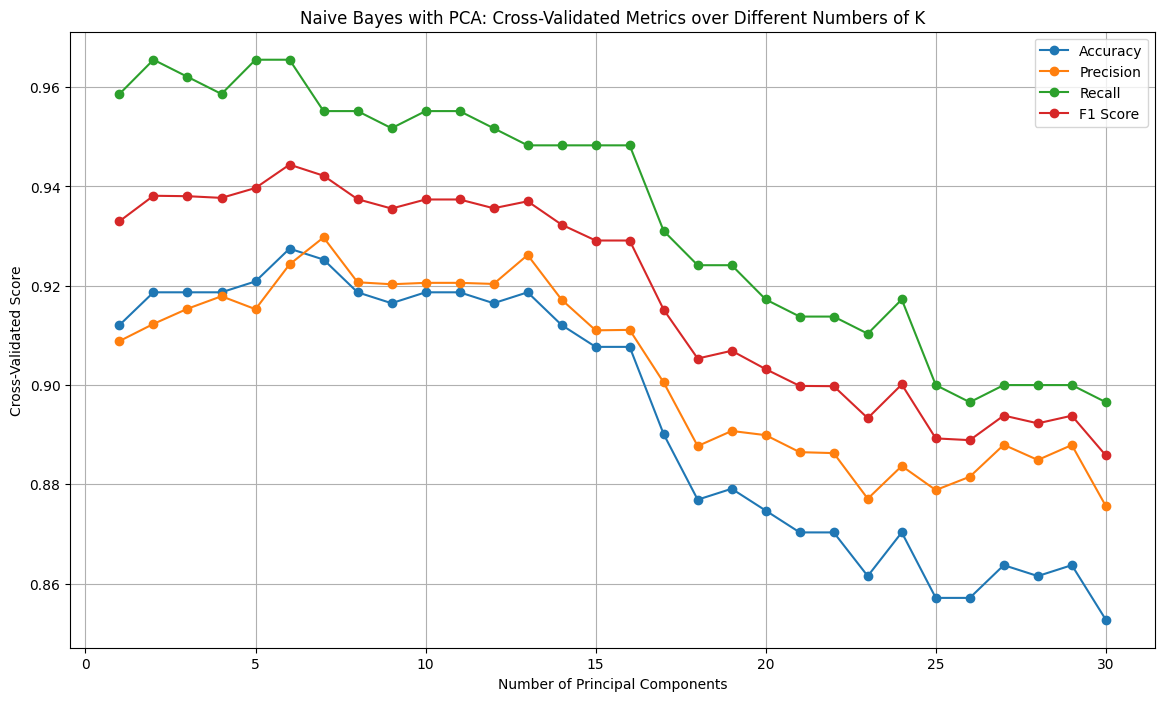

In [60]:
plt.figure(figsize=(14, 8))

plt.plot(num_components, nb_cv_accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_components, nb_cv_precision_scores, label='Precision', marker='o')
plt.plot(num_components, nb_cv_recall_scores, label='Recall', marker='o')
plt.plot(num_components, nb_cv_f1_scores, label='F1 Score', marker='o')

plt.title('Naive Bayes with PCA: Cross-Validated Metrics over Different Numbers of K')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validated Score')
plt.legend()
plt.grid(True)
plt.show()


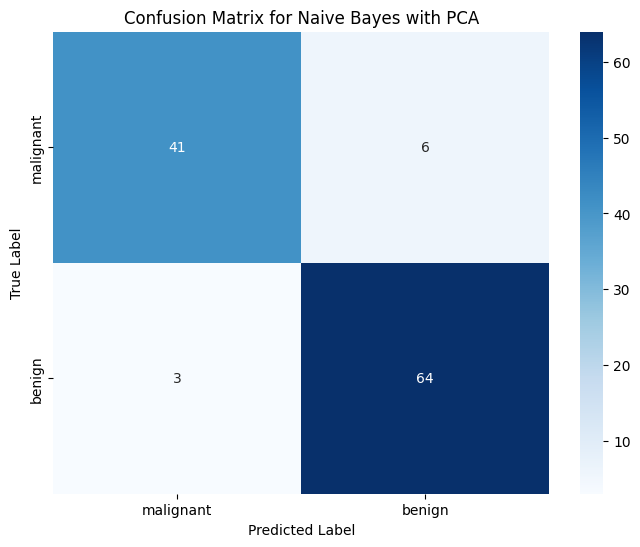

In [61]:
pca = PCA(n_components=optimal_nb_K)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train Gaussian model
nb_model_optimal = GaussianNB()
nb_model_optimal.fit(X_train_pca, Y_train)

Y_pred_nb_optimal = nb_model_optimal.predict(X_test_pca) # Predicting the test set
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb_optimal) # Calculate confusion matrix

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.title('Confusion Matrix for Naive Bayes with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
